In [1]:
import pandas as pd
import numpy as np
import statistics

In [2]:
import import_ipynb
from functions import df_to_dict, df_act_to_dict, calc_percentage_2, calc_values, calc_bayes, visualize_prediction

importing Jupyter notebook from functions.ipynb


In [3]:
lead_actress_oscars = pd.read_csv('../Best Leading Actress/oscar.csv', encoding='utf-8-sig')
lead_actress_bafta = pd.read_csv('../Best Leading Actress/bafta.csv', encoding='utf-8-sig')
lead_actress_critics = pd.read_csv('../Best Leading Actress/critics.csv', encoding='utf-8-sig')
lead_actress_sag = pd.read_csv('../Best Leading Actress/sag.csv', encoding='utf-8-sig')
lead_actress_globes= pd.read_csv('../Best Leading Actress/globes.csv', encoding='utf-8-sig')

In [4]:
lead_actress_oscars_dict = df_act_to_dict(lead_actress_oscars)
lead_actress_bafta_dict = df_act_to_dict(lead_actress_bafta)
lead_actress_critics_dict = df_act_to_dict(lead_actress_critics)
lead_actress_sag_dict = df_act_to_dict(lead_actress_sag)
lead_actress_globes_dict = df_act_to_dict(lead_actress_globes)

In [5]:
lead_actress_awards = [lead_actress_bafta_dict, 
                  lead_actress_critics_dict, 
                  lead_actress_sag_dict, 
                  lead_actress_globes_dict]

lead_actress_union_all = []

for year in range(2010, 2020):
    union_all_each = lead_actress_oscars_dict[year].union(lead_actress_bafta_dict[year], 
                                                     lead_actress_critics_dict[year], 
                                                     lead_actress_sag_dict[year],
                                                     lead_actress_globes_dict[year])    
    lead_actress_union_all.append(union_all_each)    

lead_actress_union_all

[{('Angelina Jolie', 'The Tourist'),
  ('Anne Hathaway', 'Love & Other Drugs'),
  ('Annette Bening', 'The Kids Are All Right'),
  ('Emma Stone', 'Easy A'),
  ('Hailee Steinfeld', 'True Grit'),
  ('Halle Berry', 'Frankie & Alice'),
  ('Hilary Swank', 'Conviction'),
  ('Jennifer Lawrence', "Winter's Bone"),
  ('Julianne Moore', 'The Kids Are All Right'),
  ('Michelle Williams', 'Blue Valentine'),
  ('Natalie Portman', 'Black Swan'),
  ('Nicole Kidman', 'Rabbit Hole'),
  ('Noomi Rapace', 'The Girl with the Dragon Tattoo')},
 {('Bérénice Bejo', 'The Artist'),
  ('Charlize Theron', 'Young Adult'),
  ('Elizabeth Olsen', 'Martha Marcy May Marlene'),
  ('Glenn Close', 'Albert Nobbs'),
  ('Jodie Foster', 'Carnage'),
  ('Kate Winslet', 'Carnage'),
  ('Kristen Wiig', 'Bridesmaids'),
  ('Meryl Streep', 'The Iron Lady'),
  ('Michelle Williams', 'My Week with Marilyn'),
  ('Rooney Mara', 'The Girl with the Dragon Tattoo'),
  ('Tilda Swinton', 'We Need to Talk About Kevin'),
  ('Viola Davis', 'The He

In [6]:
lead_actress_if, lead_actress_mean = calc_values(lead_actress_oscars_dict, lead_actress_awards, lead_actress_union_all)

# for year in range(2010, 2020):
#     print(len(lead_actress_union_all[year-2010]))
    

lead_actress_if
lead_actress_mean

[[0.68, 0.68, 0.22698412698412698],
 [0.7428571428571429, 0.92, 0.23432539682539683],
 [0.74, 0.74, 0.1876984126984127],
 [0.45, 0.9, 0.7970238095238096]]

In [7]:
lead_actress_2020_bafta = pd.read_csv('../Best Leading Actress/Applied Data/bafta.csv', encoding='utf-8-sig')
lead_actress_2020_critics = pd.read_csv('../Best Leading Actress/Applied Data/critics.csv', encoding='utf-8-sig')
lead_actress_2020_sag = pd.read_csv('../Best Leading Actress/Applied Data/sag.csv', encoding='utf-8-sig')
lead_actress_2020_globes = pd.read_csv('../Best Leading Actress/Applied Data/globes.csv', encoding='utf-8-sig')

In [8]:
lead_actress_2020_bafta_dict = df_act_to_dict(lead_actress_2020_bafta)[2020]
lead_actress_2020_critics_dict = df_act_to_dict(lead_actress_2020_critics)[2020]
lead_actress_2020_sag_dict = df_act_to_dict(lead_actress_2020_sag)[2020]
lead_actress_2020_globes_dict = df_act_to_dict(lead_actress_2020_globes)[2020]

In [9]:
lead_actress_2020_union_all = lead_actress_2020_bafta_dict.union(lead_actress_2020_critics_dict, 
                                                       lead_actress_2020_sag_dict,
                                                       lead_actress_2020_globes_dict)

lead_actress_2020_union_all = list(lead_actress_2020_union_all)

lead_actress_2020_awards = [lead_actress_2020_bafta_dict,
                       lead_actress_2020_critics_dict,
                       lead_actress_2020_sag_dict,
                       lead_actress_2020_globes_dict]


lead_actress_2020_union_all


[('Andra Day', 'The United States vs. Billie Holiday'),
 ('Rosamund Pike', 'I Care a Lot'),
 ('Michelle Pfeiffer', 'French Exit'),
 ('Bukky Bakray', 'Rocks'),
 ('Alfre Woodard', 'Clemency'),
 ('Maria Bakalova', 'Borat Subsequent Moviefilm'),
 ('Wunmi Mosaku', 'His House'),
 ('Viola Davis', "Ma Rainey's Black Bottom"),
 ('Kate Hudson', 'Music'),
 ('Anya Taylor-Joy', 'Emma'),
 ('Zendaya', 'Malcolm & Marie'),
 ('Carey Mulligan', 'Promising Young Woman'),
 ('Sidney Flanigan', 'Never Rarely Sometimes Always'),
 ('Vanessa Kirby', 'Pieces of a Woman'),
 ('Amy Adams', 'Hillbilly Elegy'),
 ('Radha Blank', 'The Forty-Year-Old Version'),
 ('Frances McDormand', 'Nomadland')]

In [10]:
lead_actress_final, lead_actress_prob_final = calc_bayes(lead_actress_2020_awards, lead_actress_2020_union_all, lead_actress_mean)

In [13]:
lead_actress_final_join = list(map(lambda name: " - ".join(name), lead_actress_final))
lead_actress_final_join[-1] = "Others"
lead_actress_final_join

['Vanessa Kirby - Pieces of a Woman',
 'Frances McDormand - Nomadland',
 "Viola Davis - Ma Rainey's Black Bottom",
 'Carey Mulligan - Promising Young Woman',
 'Andra Day - The United States vs. Billie Holiday',
 'Amy Adams - Hillbilly Elegy',
 'Zendaya - Malcolm & Marie',
 'Sidney Flanigan - Never Rarely Sometimes Always',
 'Wunmi Mosaku - His House',
 'Radha Blank - The Forty-Year-Old Version',
 'Bukky Bakray - Rocks',
 'Alfre Woodard - Clemency',
 'Rosamund Pike - I Care a Lot',
 'Michelle Pfeiffer - French Exit',
 'Maria Bakalova - Borat Subsequent Moviefilm',
 'Kate Hudson - Music',
 'Anya Taylor-Joy - Emma',
 'Others']

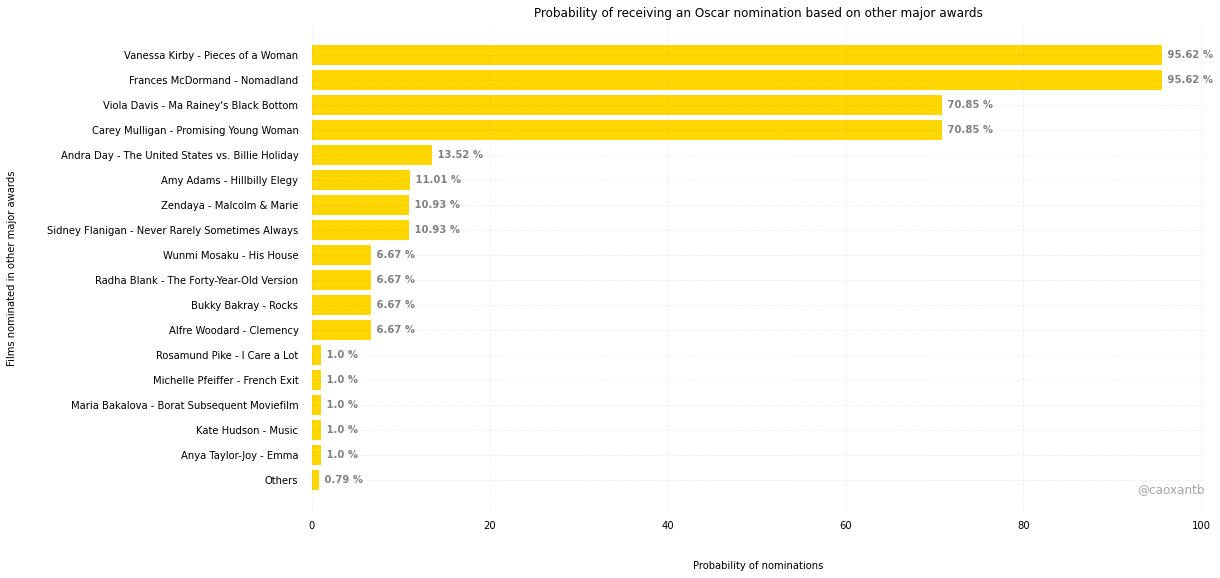

In [12]:
visualize_prediction(lead_actress_final_join, lead_actress_prob_final)